In [12]:
#Load the dataset
import pandas as pd
df = pd.read_csv("ToyotaCorolla - MLR-6.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [13]:
#summary statistics of the variables
summary_stats = df.describe(include='all')
print(summary_stats)


               Price    Age_08_04             KM Fuel_Type           HP  \
count    1436.000000  1436.000000    1436.000000      1436  1436.000000   
unique           NaN          NaN            NaN         3          NaN   
top              NaN          NaN            NaN    Petrol          NaN   
freq             NaN          NaN            NaN      1264          NaN   
mean    10730.824513    55.947075   68533.259749       NaN   101.502089   
std      3626.964585    18.599988   37506.448872       NaN    14.981080   
min      4350.000000     1.000000       1.000000       NaN    69.000000   
25%      8450.000000    44.000000   43000.000000       NaN    90.000000   
50%      9900.000000    61.000000   63389.500000       NaN   110.000000   
75%     11950.000000    70.000000   87020.750000       NaN   110.000000   
max     32500.000000    80.000000  243000.000000       NaN   192.000000   

          Automatic           cc        Doors  Cylinders        Gears  \
count   1436.000000   1436

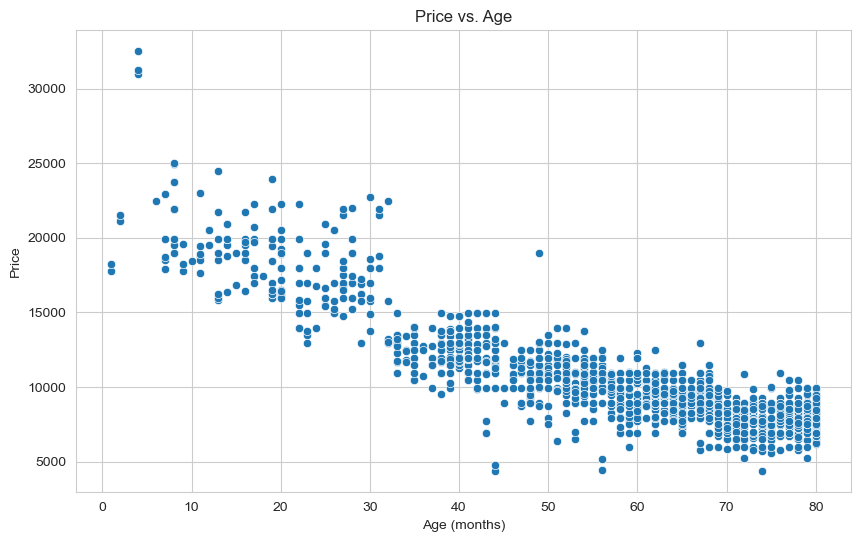

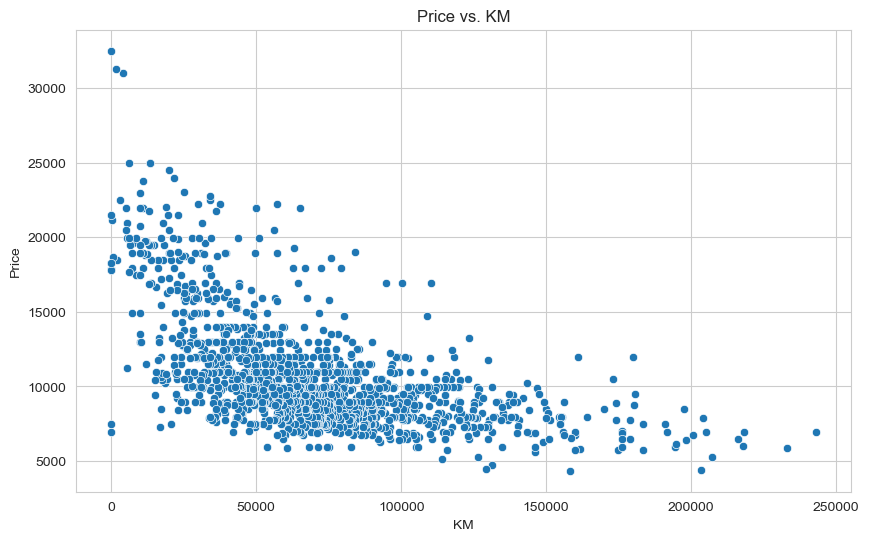

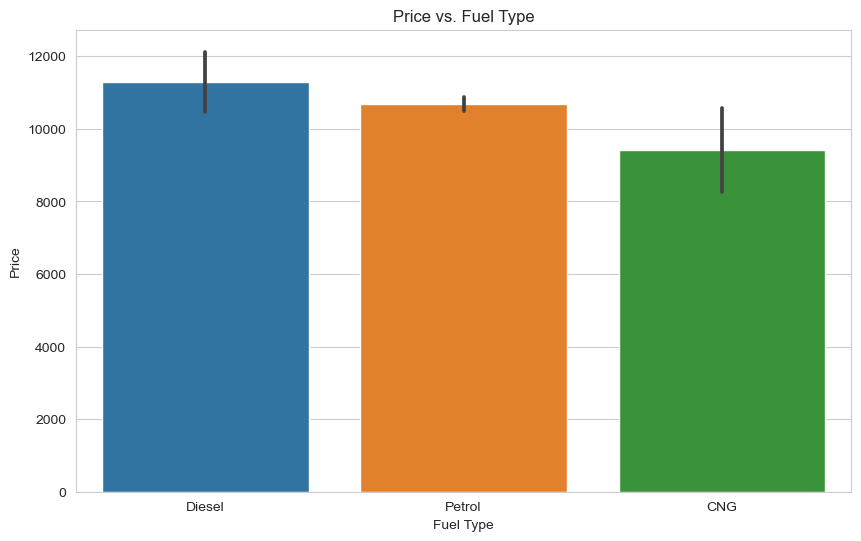

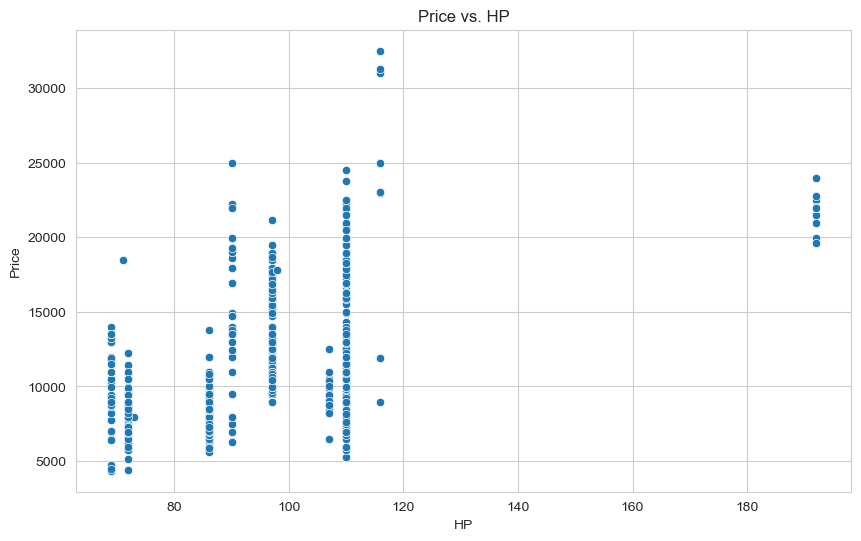

In [14]:
# provide visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Scatter plot of Price vs. Age_08_04
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_08_04', y='Price')
plt.title('Price vs. Age')
plt.xlabel('Age (months)')
plt.ylabel('Price')
plt.show()

# Scatter plot of Price vs. KM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='KM', y='Price')
plt.title('Price vs. KM')
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

# Bar plot of Price vs. Fuel_Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Fuel_Type', y='Price')
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Scatter plot of Price vs. HP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HP', y='Price')
plt.title('Price vs. HP')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()


In [15]:
# Pre process the data 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the Fuel_Type column
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric features
numeric_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2203043.823143705


In [16]:
# Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1148, 10)
X_test shape: (288, 10)
y_train shape: (1148,)
y_test shape: (288,)


In [50]:
# Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model.
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
import pandas as pd
df = pd.read_csv("ToyotaCorolla - MLR-6.csv")
print(df)

# List the columns to identify the correct target column name
print("Columns in dataset:\n", df.columns)

# Replace 'target_column' with the actual name of your target column
target_column = 'Price'  # Adjust this to your target column name

# Splitting into features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Interpreting coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Print coefficients
print("Model Coefficients:\n", coefficients)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

In [31]:
# Build Multiple Models-Using All Features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
print(f'Model 1 - Mean Squared Error: {mse1}')
print(f'Model 1 - Coefficients: {model1.coef_}')


Model 1 - Mean Squared Error: 2203043.823143705
Model 1 - Coefficients: [-2.24666244e+03 -6.08570564e+02  2.10253304e+02  1.48830927e+02
 -1.28850688e+01 -6.03109744e+01  1.42108547e-12  5.51600710e+02
  1.36213868e+03 -6.85487568e+01  1.37080891e+03]


In [33]:
# Build Multiple Models-Using a Subset of Features (e.g., Age, KM, HP)
# Model 2: Using Age, KM, and HP
features_model2 = ['Age_08_04', 'KM', 'HP']
model2 = LinearRegression()
model2.fit(X_train[features_model2], y_train)
y_pred2 = model2.predict(X_test[features_model2])

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
print(f'Model 2 - Mean Squared Error: {mse2}')
print(f'Model 2 - Coefficients: {model2.coef_}')


Model 2 - Mean Squared Error: 2530780.7798338956
Model 2 - Coefficients: [-2857.7522701   -424.18093009   519.24258895]


In [34]:
# Build Multiple Models- Using Another Subset of Features (e.g., Age, KM, Fuel_Type_Petrol)
# Model 3: Using Age, KM, and Fuel_Type_Petrol
features_model3 = ['Age_08_04', 'KM', 'Fuel_Type_Petrol']
model3 = LinearRegression()
model3.fit(X_train[features_model3], y_train)
y_pred3 = model3.predict(X_test[features_model3])

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
print(f'Model 3 - Mean Squared Error: {mse3}')
print(f'Model 3 - Coefficients: {model3.coef_}')


Model 3 - Mean Squared Error: 2883236.8354520937
Model 3 - Coefficients: [-2763.02135965  -734.15526833  -592.50653031]


In [38]:
# Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Example data
y_test = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2 Score): {:.4f}".format(r2))

Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.61
Mean Absolute Error (MAE): 0.50
R-squared (R2 Score): 0.9486


In [39]:
#Apply Lasso and Ridge methods on the model
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ... (Preceding code remains the same)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)
print("Lasso Coefficients:", lasso_model.coef_)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
print("Ridge Coefficients:", ridge_model.coef_)

Lasso Coefficients: [-2246.59855102  -608.84378955   210.90372999   147.27137781
   -12.84095278   -60.11525807     0.           548.77369477
  1361.19172666   -65.25233597  1370.13763866]
Ridge Coefficients: [-2246.35581748  -609.06133574   210.49518025   148.70022949
   -12.87028468   -60.19429782     0.           550.74021189
  1361.58779535   -74.87354908  1362.18065299]
